<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [4]:
## from github
url = "https://raw.githubusercontent.com/Geez-l/Project_197/glee-branch/dataset/dataset.csv"
dataset = pd.read_csv(url)

dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


In [5]:
dataset.columns

Index(['Date', 'Croptype', 'Province', 'Area', 'Production', 'Yield'], dtype='object')

In [6]:
dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


Create features


In [12]:
def create_features(dataset):

    # Create a copy to avoid modifying the original dataset
    dataset1 = dataset.copy()  # Use dataset1, not dataset

    # Convert 'Date' column to datetime, coercing errors to NaT (Not a Time)
    dataset1['Date'] = pd.to_datetime(dataset1['Date'], errors='coerce')

    # Extract year, month, quarter from Date
    dataset1['Year'] = dataset1['Date'].dt.year
    dataset1['Month'] = dataset1['Date'].dt.month
    dataset1['Quarter'] = dataset1['Date'].dt.quarter

    return dataset1

# Apply the feature creation function
dataset1 = create_features(dataset)

# Display the first few rows to check
dataset1.head()


,Date,Croptype,Province,Area,Production,Yield,Year,Month,Quarter
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918,1987,1,1
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229,1987,1,1
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857,1987,1,1
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857,1987,1,1
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637,1987,1,1


One hot encoding for categorical variable

In [13]:
dataset = pd.get_dummies(dataset, columns=['Croptype', 'Province'], drop_first=True)

In [14]:
dataset = dataset.sort_values('Date')

In [15]:
dataset.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo
0,1987-01-01,6130.0,19309.0,3.149918,1987,1,1,True,False,False,False,False,False,False,False,False
29,1987-01-01,7160.0,4136.0,0.577654,1987,1,1,False,False,False,False,False,False,False,False,True
28,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,False,True,False
27,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,True,False,False
26,1987-01-01,240.0,37.0,0.154167,1987,1,1,False,False,False,False,False,True,False,False,False


In [16]:
dataset['Yield_Lag1'] = dataset['Yield'].shift(1)

In [17]:
dataset = dataset.dropna()

In [18]:
x = dataset[['Area', 'Production', 'Year', 'Month', 'Quarter'] + [col for col in dataset.columns if 'Croptype' in col or 'Province' in col] + ['Yield_Lag1']]
y = dataset['Yield']

Split the data

In [19]:
from sklearn.model_selection import train_test_split

# Train-test split without shuffling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)


In [20]:
dataset.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1
29,1987-01-01,7160.0,4136.0,0.577654,1987,1,1,False,False,False,False,False,False,False,False,True,3.149918
28,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,False,True,False,0.577654
27,1987-01-01,3540.0,4582.0,1.294350,1987,1,1,False,False,False,False,False,False,True,False,False,1.294350
26,1987-01-01,240.0,37.0,0.154167,1987,1,1,False,False,False,False,False,True,False,False,False,1.294350
25,1987-01-01,80.0,47.0,0.587500,1987,1,1,False,False,False,False,False,False,False,False,False,0.154167


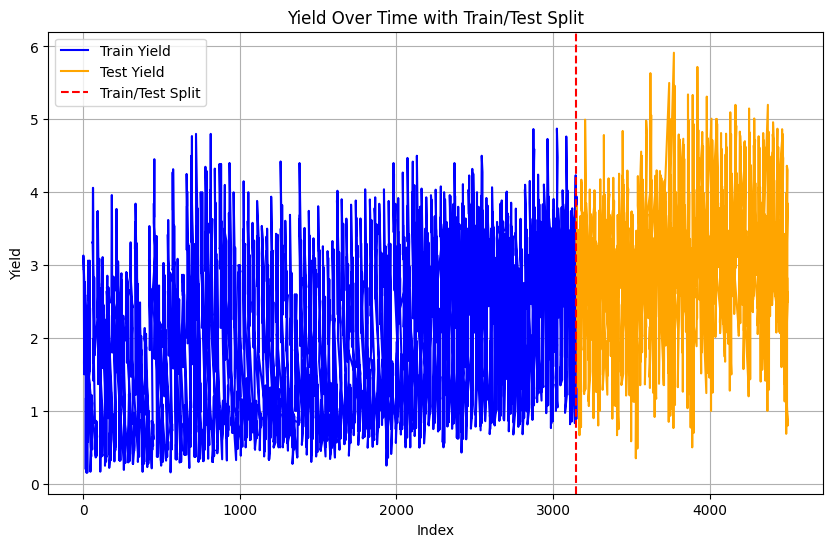

In [21]:
import matplotlib.pyplot as plt

# Calculate the indices for the split point
split_index = len(x_train)

# Plot the training data
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Train Yield', color='blue')

# Plot the test data
plt.plot(y_test.index, y_test.values, label='Test Yield', color='orange')

# Add a vertical line for the train/test split
plt.axvline(x=split_index, color='red', linestyle='--', label='Train/Test Split')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Yield')
plt.title('Yield Over Time with Train/Test Split')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [22]:
dataset_test = x_test.copy()

In [23]:
dataset_test['Actual_Yield'] = y_test.values

# Linear Regression

In [26]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
# Initializing and fit the model
linearRegression = LinearRegression()
linearRegression.fit(x_train_scaled, y_train)

LinearRegression()

In [28]:
# Evaluate the model on the test set
y_pred = linearRegression.predict(x_test_scaled)

Cross-validation

In [29]:
# Cross-validation (Linear Regression)
cv_scores = cross_val_score(linearRegression, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV

print(f"Cross-validation Mean MSE: {-cv_scores.mean()}")

Cross-validation Mean MSE: 0.4547712691772804


# Prediction

In [30]:
# Predictions for Yield using Linear Regression
pred_linearReg_yield = linearRegression.predict(x_test_scaled)

# Adding predictions to the dataset_test dataframe
dataset_test["Linear Regression Yield Predictions"] = pred_linearReg_yield


In [31]:
dataset_test.head()

,Area,Production,Year,Month,Quarter,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Yield_Lag1,Actual_Yield,Linear Regression Yield Predictions
3171,674.0,2317.0,2013,4,2,False,False,False,False,True,True,False,False,False,2.890364,3.437685,2.032645
3167,60.0,109.0,2013,4,2,False,False,False,True,False,False,True,False,False,3.437685,1.816667,1.716542
3168,6.0,4.0,2013,4,2,False,False,False,True,False,False,False,True,False,1.816667,0.666667,1.321321
3169,3500.0,8180.0,2013,4,2,False,False,False,True,False,False,False,False,True,0.666667,2.337143,1.540223
3170,345.0,1070.0,2013,4,2,False,False,False,False,True,False,False,False,False,2.337143,3.101449,1.975724


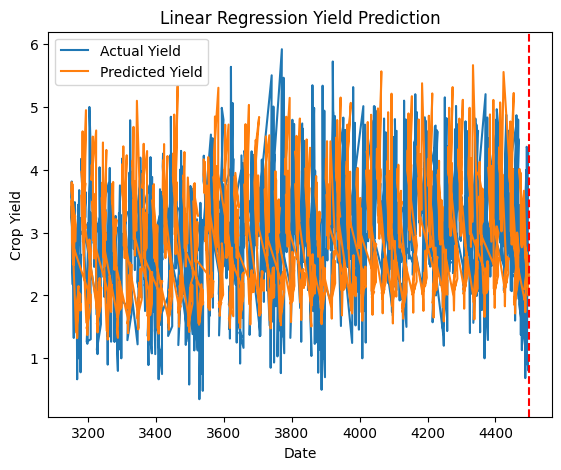

In [38]:
# Data Visualization
ax = dataset_test['Actual_Yield'].plot(figsize=(6.5, 5), label="Actual Yield")
dataset_test["Linear Regression Yield Predictions"].plot(ax=ax, label="Predicted Yield")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')

plt.xlabel("Date")
plt.ylabel("Crop Yield")
plt.title("Linear Regression Yield Prediction")
plt.legend(loc="upper left")
plt.show()


#Evaluation Metrics

MSE & R2

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.0062100610342166
R-squared: -0.16412576592070782


RMSE

In [40]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.0031002248201406


MAPE

In [41]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')


Mean Absolute Percentage Error: 0.2649366294081772
